In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import re
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
import os
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import matplotlib.image as img

import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [2]:
pd.set_option('display.max.colwidth', 100)


In [3]:
dir = os.getcwd()
print(dir)
os.chdir(r"..\data")
os.listdir()

C:\Users\hoguma\Like lion\Like Lion ML projects\Final Folder


['artists.csv',
 'cluster1.jpeg',
 'cluster2.jpeg',
 'cluster3.jpeg',
 'cluster4.jpeg',
 'cluster5.jpeg',
 'cluster6.jpeg',
 'data_by_artist_o.csv',
 'data_by_genres_o.csv',
 'data_by_year_o.csv',
 'data_final.csv',
 'data_o.csv',
 'data_real_final.csv',
 'dict_artists.json',
 'en-ko songs.csv',
 'songs_en.csv',
 'song_recommendation.csv',
 'tracks.csv']

## K-means 돌려보기

In [4]:
df_use = pd.read_csv('data_real_final.csv')

In [5]:
df_use.head()

,id,name,artists,acousticness,instrumentalness,danceability,energy,liveness,valence,loudness,lang,release_date,popularity,speechiness
0,35iwgR4jXetI318WEWsa1Q,Carve,Uli,0.674,0.744000,0.645,0.445,0.151,0.127,0.479384,en,1922-02-22,6,0.4510
1,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,Dick Haymes,0.989,0.130000,0.402,0.158,0.311,0.196,0.336933,en,1922,0,0.0390
2,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,Greg Fieler,0.620,0.006450,0.488,0.475,0.107,0.544,0.364047,en,1922,0,0.0399
3,1HXdv1z9RlvrcUernyf0MY,The Dear Little Shamrock,Dick Haymes,0.991,0.000133,0.347,0.197,0.196,0.246,0.386843,en,1922,0,0.0504
4,1O9iZyzufN1fUdVO97mmm5,How High the Moon,"Dick Haymes, Harry James, His Orchestra",0.989,0.277000,0.328,0.307,0.210,0.259,0.549970,en,1922,0,0.0484


In [6]:
X = df_use.drop(['name','artists','lang','id','release_date','popularity'], axis=1)
X = X.values

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

군집 개수 : 2 / inertia : 10896.436314739527
군집 개수 : 3 / inertia : 8660.815266989595
이전 군집과의 차이 : 2235.6210477499317
군집 개수 : 4 / inertia : 7313.393190929592
이전 군집과의 차이 : 1347.4220760600037
군집 개수 : 5 / inertia : 6548.779778045258
이전 군집과의 차이 : 764.6134128843332
군집 개수 : 6 / inertia : 5873.011711093539
이전 군집과의 차이 : 675.7680669517194
군집 개수 : 7 / inertia : 5446.970899990751
이전 군집과의 차이 : 426.0408111027882
군집 개수 : 8 / inertia : 5086.132118413819
이전 군집과의 차이 : 360.838781576932
군집 개수 : 9 / inertia : 4771.110203899406
이전 군집과의 차이 : 315.02191451441286


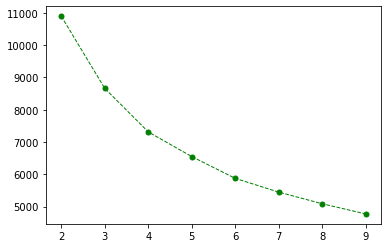

In [28]:
n_cluster = range(2,10)                  # 군집 갯수에 해당하는 리스트.
total_ss = []                            # "total internal sum of squares"에 해당하는 리스트.
for n in n_cluster:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    total_ss.append(kmeans.inertia_)      # kmeans의 inertia_ 속성이 바로 "Total Internal SS"!!!
for j in range(len(total_ss)):
    if j==0:
        print("군집 개수 : "+ str(j+2)+" / inertia : " + str(total_ss[j]))
    else:
        print("군집 개수 : "+ str(j+2)+" / inertia : " + str(total_ss[j]))

        print("이전 군집과의 차이 : " + str(total_ss[j-1]-total_ss[j]))
plt.plot(n_cluster,total_ss,color='green',marker='o',linestyle='dashed',linewidth=1,markersize=5)
plt.show()

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 1234)
y_kmeans = kmeans.fit_predict(X)

In [8]:
df_use["Y"] = y_kmeans
df_use["Y"].value_counts()

4    7494
3    6078
1    6021
2    5817
0    4946
5    3057
Name: Y, dtype: int64

In [9]:
# df_use.to_csv("data_real_final.csv", encoding="utf-8", index=False)

<Figure size 576x432 with 0 Axes>

<AxesSubplot:ylabel='Y'>

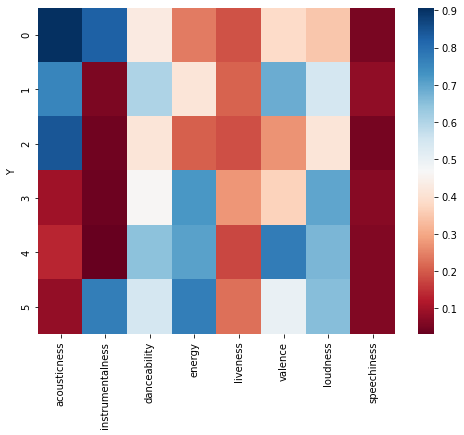

In [10]:
df_num = df_use[['acousticness','instrumentalness','danceability','energy','liveness','valence','loudness','speechiness',"Y"]]
plt.figure(figsize=(8,6))
sns.heatmap(df_num.groupby("Y").mean(), cmap="RdBu")

# -- 군집이름 및 이유 
#### 각 군집별 변수의 특성과 해당되는 노래를 들어보고 느낌을 반영하여 군집이름을 작성

### 0. '눈을 감고 우주를 떠다니는 시간 | Floating in Space'
### 1. '너와 나란히 걷다가 열대야를 잊곤 했지' 
### 2.  '우리 사랑이 영화라면 주제가가 되겠지'
### 3. '?! 안녕? 우리 친구할래?ㅣ풋풋한 하이틴 영화 브금 같은 생기발랄 POP', 
### 4. '얼어붙은 밤을 뜨겁게 달궈줄 Sexy & Groovy'
### 5. '함께 즐겨요! 랜선 락페 Online Rock Festival' 


# --

In [11]:
def song_recommendation():
    print("질문 10개로 노래 추천 받아볼래?(100점 만점에)")

    new_user = {}

    new_user['acousticness']= [int(input('Acousticness : '))/100]
    new_user['instrumentalness'] = [int(input('Instrumentalness : '))/100]
    new_user['danceability'] = [int(input('Danceability : '))/100]
    new_user['energy'] = [int(input('Energy : '))/100]
    new_user['liveness'] = [int(input('Liveness : '))/100]
    new_user['valence'] = [int(input('Valence : '))/100]
    new_user['loudness'] = [int(input('Loudness : '))/100]
    new_user['speechiness'] = [int(input('Speechiness : '))/100]

    years_prefer = input('추천받고 싶은 노래의 시대는? (1)2020년 ~ 2021년  (2)2010년 ~ 2019년 (3)2000년 ~ 2009년 (4)1990년 ~ 1999년 (5) xxxx ~ 1990년 : ')
    popularity_prefer = input('당신이 찾고 싶은 노래는? (1)나만 아는 노래  (2)너도 아는 노래 (3)우리만 아는 노래 (4)재도 아는 노래 (5) 길에서 들리는 노래 : ')

    X_test = pd.DataFrame(new_user)

    learnedLabels = ['눈을 감고 우주를 떠다니는 시간 | Floating in Space', '너와 나란히 걷다가 열대야를 잊곤 했지', 
                     '우리 사랑이 영화라면 주제가가 되겠지', '?! 안녕? 우리 친구할래?ㅣ풋풋한 하이틴 영화 브금 같은 생기발랄 POP', 
                     '얼어붙은 밤을 뜨겁게 달궈줄 Sexy & Groovy','함께 즐겨요! 랜선 락페 Online Rock Festival']  

    predCluster = kmeans.predict(X_test)[0] #사용자 군집 예측값
    print('\n')
    print('\n')
    print("_*_" * 30)
    print('\n')
    print("접수한 내용으로 노래 추천 드립니다")
    print('\n')
    print("_*_" * 30)
    print('\n')
    image = img.imread('cluster%s.jpeg'%str(predCluster+1))
    plt.figure(figsize=(10,8))
    plt.axis('off')
    plt.imshow(image)
    plt.show()
    print('\n')
    print("당신의 유형은 '{}' 입니다! ".format(learnedLabels[predCluster]))
    print('\n')
    print("_*_" * 30)
    print('\n')
    # 사용자에게 추천해 줄 노래 목록
    # 년도와 유명한 정도?를 선택하면 정렬해서 상위 10개

    df_focus = df_use[df_use["Y"]==predCluster]
    df_focus["release_year"] = df_focus["release_date"].apply(lambda x: int(x[0:4]))


    if years_prefer=='1':
        df_focus = df_focus[df_focus['release_year']>=2020]
    elif years_prefer=='2':
        df_focus = df_focus[(df_focus['release_year']<2020)&(df_focus['release_year']>=2010)]
    elif years_prefer=='3':
        df_focus = df_focus[(df_focus['release_year']<2010)&(df_focus['release_year']>=2000)]
    elif years_prefer=='4':
        df_focus = df_focus[(df_focus['release_year']<2000)&(df_focus['release_year']>=1990)]
    elif years_prefer=='5':
        df_focus = df_focus[(df_focus['release_year']<1990)]


    df_focus = df_focus.sort_values(by="popularity", ascending=True)    


    if popularity_prefer=='1':
        df_focus = df_focus.iloc[int(len(df_focus)*(0.0)):int(len(df_focus)*(0.2)),:]
    elif popularity_prefer=='2':
        df_focus = df_focus.iloc[int(len(df_focus)*(0.2)):int(len(df_focus)*(0.4)),:]
    elif popularity_prefer=='3':
        df_focus = df_focus.iloc[int(len(df_focus)*(0.4)):int(len(df_focus)*(0.6)),:]
    elif popularity_prefer=='4':
        df_focus = df_focus.iloc[int(len(df_focus)*(0.6)):int(len(df_focus)*(0.8)),:]
    elif popularity_prefer=='5':
        df_focus = df_focus.iloc[int(len(df_focus)*(0.8)):int(len(df_focus)*(1.0)),:]

    
    
    df_show = df_focus[['artists','name']]
    df_show = df_show.sample(frac =1, random_state=1004)
    df_show = df_show.reset_index(drop = True)
    
    artists_numb = df_show.artists.nunique()

    artists_name = df_show.artists.unique().tolist()

    if  10 < artists_numb:
        artists_name = df_show.artists.unique().tolist()[:10]
#         print(artists_name)
    else:
        artists_name = df_show.artists.unique().tolist()
#         print(artists_name)
    
    artists_name_result = []
    for x in range(len(artists_name)):
        for i in range(len(df_show)):
            if artists_name[x] == df_show.iloc[i,0]:
                artists_name_result.append(i)
                break
            else:
                continue

    df_show = df_show.iloc[artists_name_result,:]
    
    print("당신을 위한 맞춤 추천곡 top 10!!")
    print('\n')
    display(df_show)


## 추천 받아보기

질문 10개로 노래 추천 받아볼래?(100점 만점에)
Acousticness : 90
Instrumentalness : 50
Danceability : 30
Energy : 7
Liveness : 50
Valence : 50
Loudness : 20
Speechiness : 40
추천받고 싶은 노래의 시대는? (1)2020년 ~ 2021년  (2)2010년 ~ 2019년 (3)2000년 ~ 2009년 (4)1990년 ~ 1999년 (5) xxxx ~ 1990년 : 2
당신이 찾고 싶은 노래는? (1)나만 아는 노래  (2)너도 아는 노래 (3)우리만 아는 노래 (4)재도 아는 노래 (5) 길에서 들리는 노래 : 5




_*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*_


접수한 내용으로 노래 추천 드립니다


_*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*_




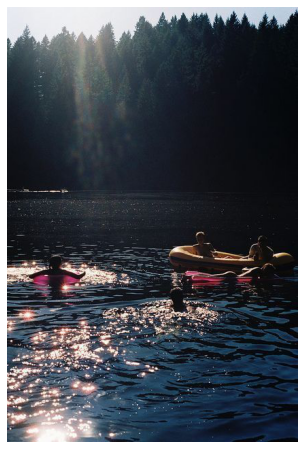



당신의 유형은 '눈을 감고 우주를 떠다니는 시간 | Floating in Space' 입니다! 


_*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*__*_


당신을 위한 맞춤 추천곡 top 10!!




,artists,name
0,potsu,i'm closing my eyes
1,"Paul Kalkbrenner, Fritz Kalkbrenner",Sky and Sand
2,"Ocean Waves For Sleep, Ocean Sounds Collection, Ocean Sounds, Fresh Water Sounds, Water Sound Na...",Rolling Ocean Waves
3,Sufjan Stevens,Visions of Gideon
4,Radical Face,Welcome Home
5,Abel Korzeniowski,Dance For Me Wallis
6,The Strokes,"Call It Fate, Call It Karma"
7,"Alexandre Desplat, London Symphony Orchestra",The Imitation Game
8,The Piano Guys,A Thousand Years
9,Khruangbin,White Gloves


In [13]:
song_recommendation()